# Capstone2

In [1]:
import matplotlib.pyplot as plt
import pickle

import sys
sys.path.insert(0, '../src')
import helpers as h
import score_metrics as sm
import score_costs as sc
import smote_tuning as st

# target_names = ['Legitimate', 'Fraud']

In [2]:
X_train, X_test, \
y_train, y_test, \
c_train, c_test, \
X_holdout, y_holdout, c_holdout, \
features = h.load_data(4, engineered_features=False)

In [3]:
# classifiers = h.initialize_classifier_dict()
classifiers = h.load_classifier_dict("classifiers_ver00.pickle")
clf_lst = [clf for clf in classifiers]

In [4]:
# sm.score_classifiers(clf_lst, classifiers, X_train, y_train, X_test, y_test)
# h.save_classifier_dict(classifiers, version="00")

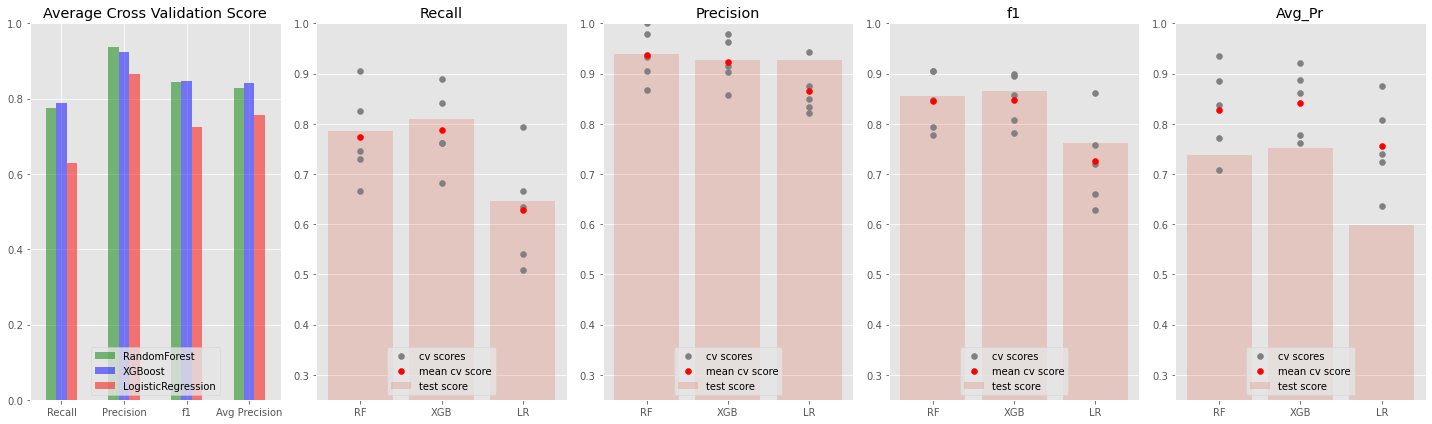

In [5]:
fig = sm.plot_all_metrics(clf_lst, classifiers)
plt.show()

In [6]:
# Business Parameters:
FraudBudget=0.0005
ReviewCost=10
ChargebackFee=20


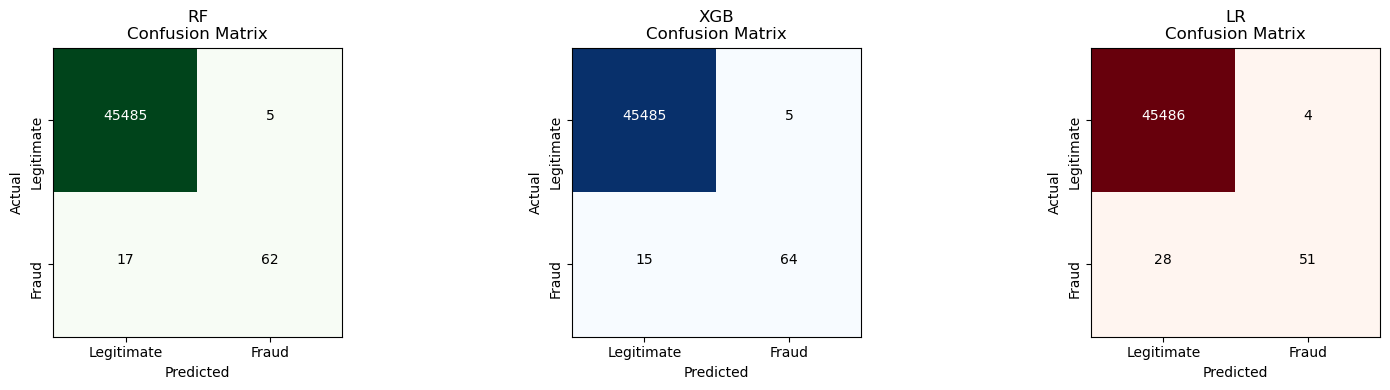

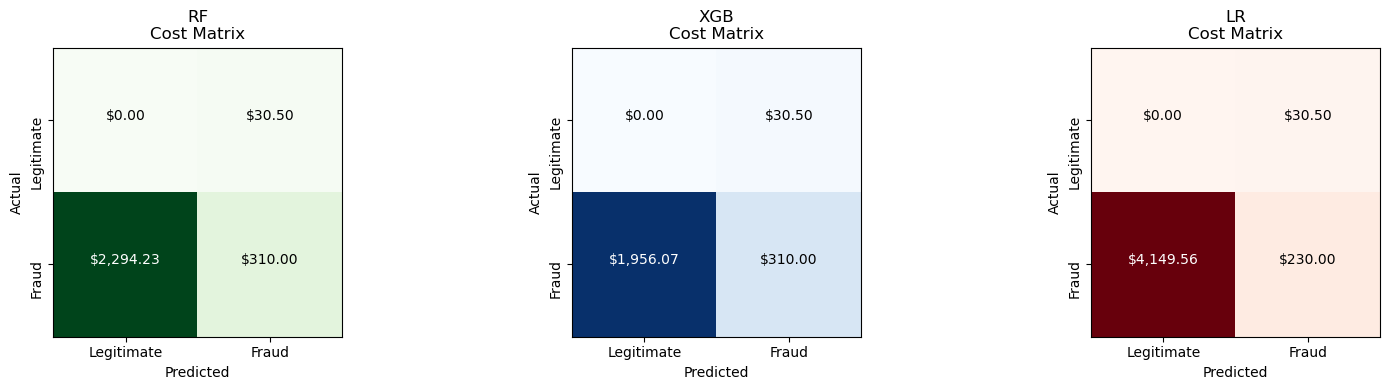

In [7]:

cost_matrix = sc.partial_review(c_test, ReviewCost, ChargebackFee)
sc.class_probabilities(clf_lst, classifiers, X_test, y_test, cost_matrix=cost_matrix)

sc.plot_multiple_confusion_matrix(clf_lst, classifiers, CostSensitive=False)
sc.plot_multiple_confusion_matrix(clf_lst, classifiers, CostSensitive=True)

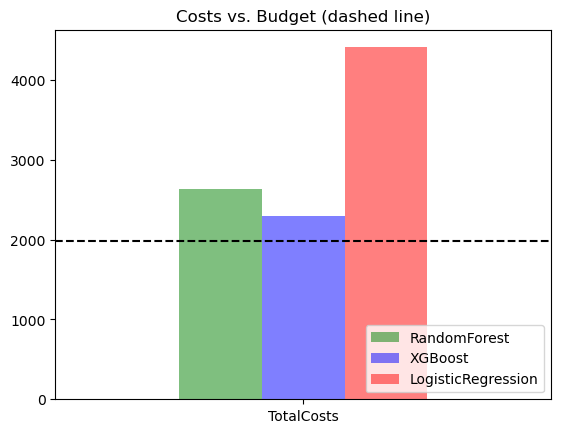

In [8]:
fig, ax = plt.subplots()
sc.plot_total_cost(ax, clf_lst, classifiers, c_test, y_test)

In [9]:
classifiers = st.add_smote_classifiers_to_dict(clf_lst, classifiers)

KeyError: 'RF_smote'

### Voting Classifier Analysis

In [ ]:
# classifiers = sm.create_voting_classifier(clf_lst, classifiers, X_train, y_train)
# clf_lst.append("Voting")

In [ ]:
# cost_matrix = sc.partial_review(c_test, ReviewCost, ChargebackFee)
# sc.class_probabilities(clf_lst, classifiers, X_test, y_test, cost_matrix=cost_matrix)

# sc.plot_multiple_confusion_matrix(clf_lst, classifiers, CostSensitive=False)
# sc.plot_multiple_confusion_matrix(clf_lst, classifiers, CostSensitive=True)

# fig, ax = plt.subplots()
# sc.plot_total_cost(ax, clf_lst, classifiers, c_test, y_test)

In [ ]:
# evaluate fitted model on holdout data
# this will overwrite the classifier cost fields.


# cost_matrix = sc.partial_review(c_holdout, ReviewCost, ChargebackFee)
# sc.class_probabilities(clf_lst, classifiers, X_holdout, y_holdout, cost_matrix=cost_matrix)

# sc.plot_multiple_confusion_matrix(clf_lst, classifiers, CostSensitive=False)
# sc.plot_multiple_confusion_matrix(clf_lst, classifiers, CostSensitive=True)
# fig, ax = plt.subplots()
# sc.plot_total_cost(ax, clf_lst, classifiers, c_holdout, y_holdout)